In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [86]:
np.set_printoptions(threshold =  np.nan)
pd.set_option('display.max_columns', 999)

In [87]:
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding = 'latin-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [89]:
data.shape

(170350, 135)

## Part 2 Bayes

Part Two: Bayesian Inference
Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.

Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region).

You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your classmates.

You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

**Definition of Terrorism:**

"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

#### Couldn't decide which to pick so I used random choice and doing Southeast Asia

In [41]:
new_data.region.unique()

array([ 2,  1,  5,  8,  4,  3,  9, 11, 10, 12,  6,  7])

In [51]:
np.random.choice(new_data.region.unique())

5

In [90]:
new_data.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Armed Assault', 'Hijacking',
       'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)'], dtype=object)

In [91]:
se_asia_data = data[data['region'] == 5].reset_index(drop = True)

In [92]:
se_asia_data_bombing = se_asia_data[se_asia_data['attacktype1_txt'] == 'Bombing/Explosion'].reset_index(drop = True)

In [93]:
se_asia_data_bombing.groupby('iyear').count().head()

,eventid,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
iyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,6,6,6,0,6,0,6,6,6,6,6,6,5,5,6,6,0,0,6,6,6,6,0,0,6,6,6,6,6,0,0,0,0,6,6,6,6,0,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,6,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0,0,6,0,0,6,5,5,5,0,6,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,0
1971,3,3,3,0,3,0,3,3,3,3,3,3,2,2,3,3,0,0,3,3,3,3,1,1,3,3,3,3,3,0,0,0,0,3,3,3,3,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,0,0,3,3,3,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0
1972,3,3,3,0,3,0,3,3,3,3,2,3,3,3,3,3,0,0,3,3,3,3,0,0,3,3,3,3,3,0,0,0,0,3,3,3,3,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,1,1,1,1,0,0,0,0,0,0,0,0,3,3,0,0,3,0,0,3,2,2,2,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0
1973,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1975,3,3,3,0,3,0,3,3,3,3,1,3,3,3,3,3,0,0,3,3,3,3,0,0,3,3,3,3,3,0,0,0,0,3,3,3,3,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,1,2,1,1,3,3,3,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,0


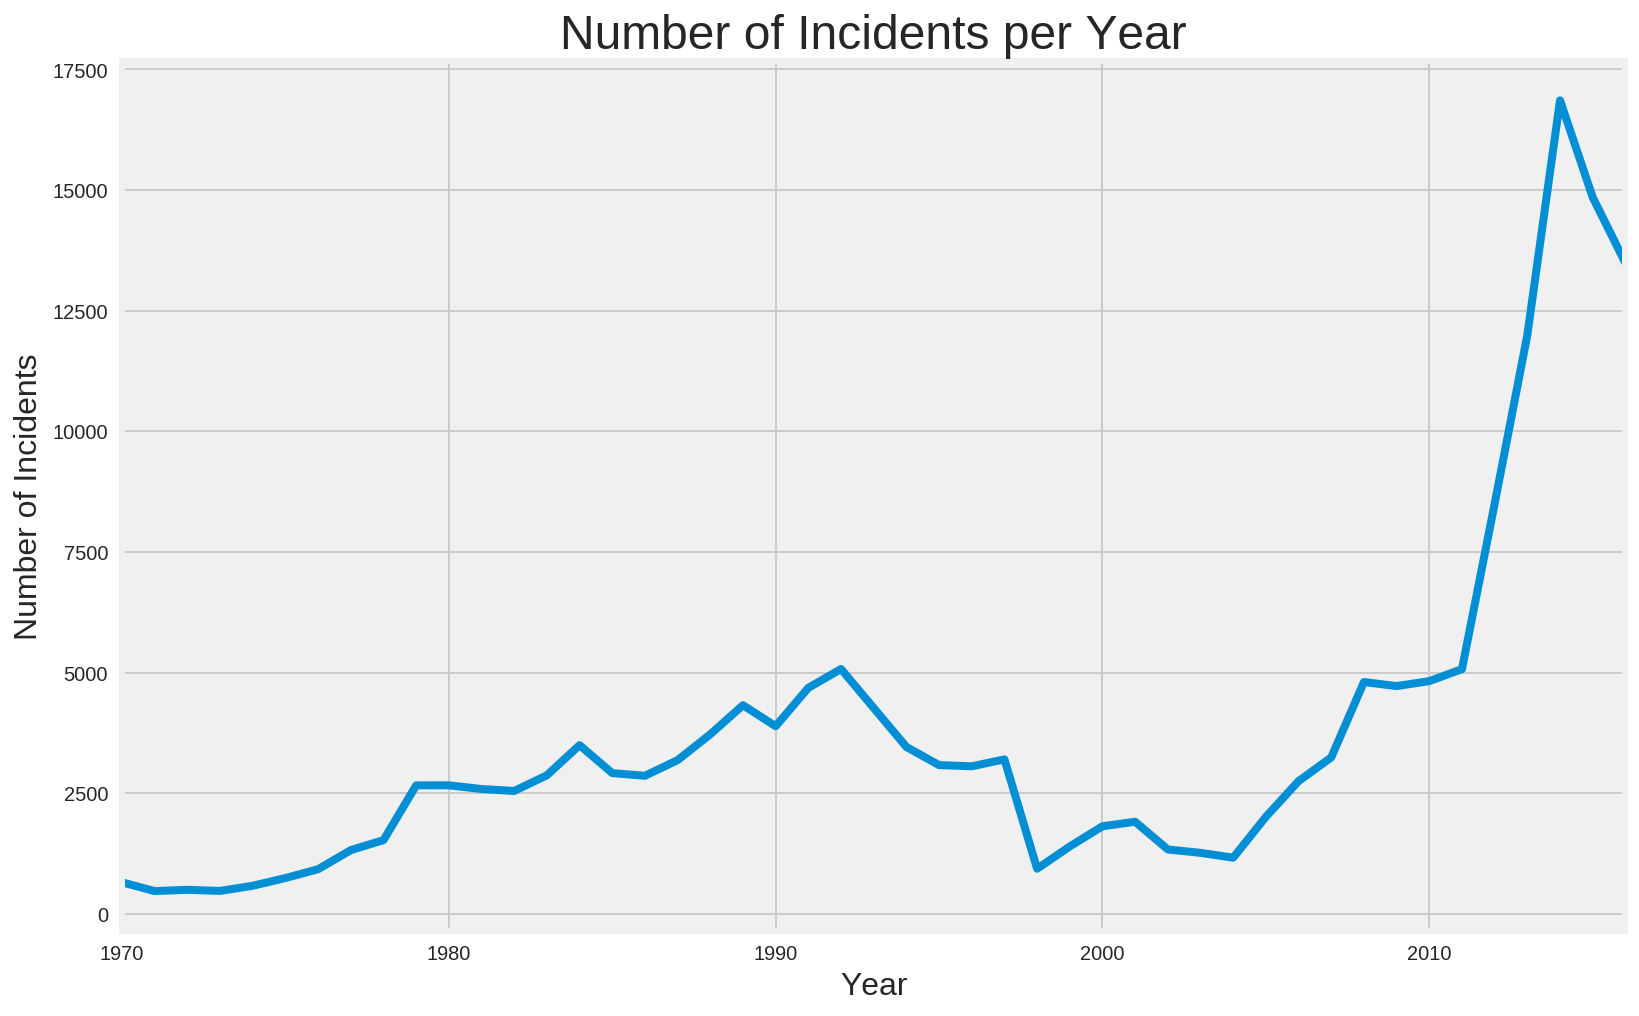

In [108]:
plt.figure(figsize = (12, 8))
new_data.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Incidents per Year', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.xticks(np.arange(1995, 2017))
plt.ylabel('Number of Incidents', fontsize = 16);

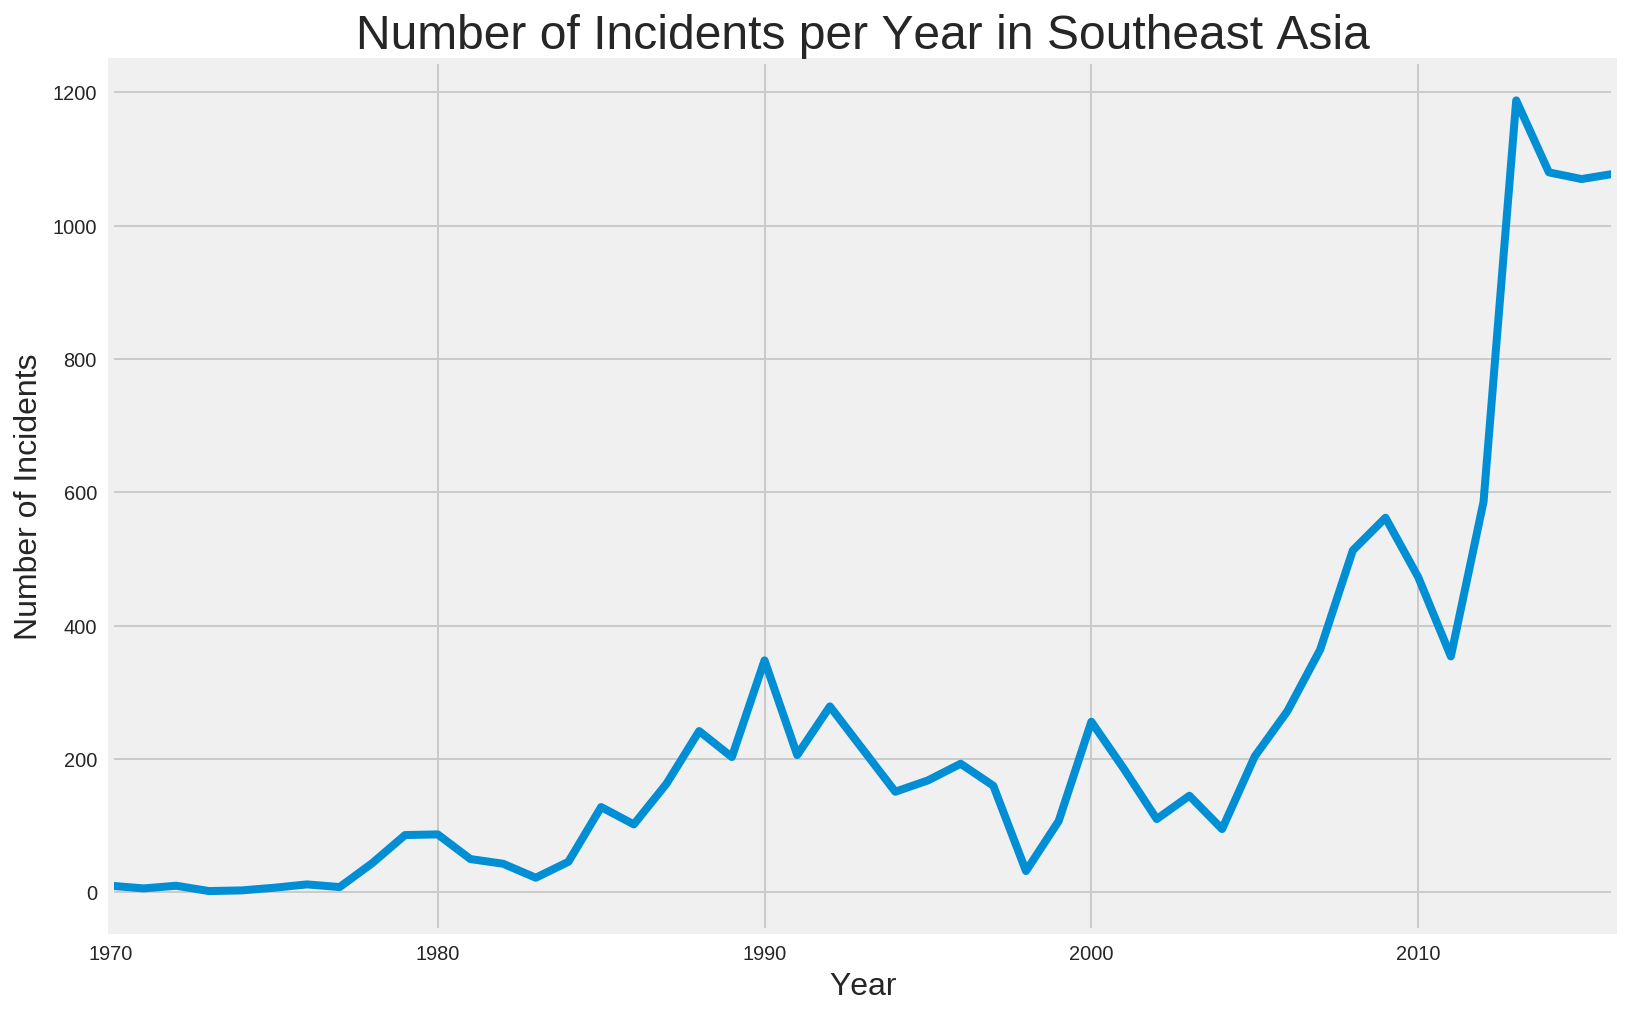

In [102]:
plt.figure(figsize = (12, 8))
se_asia_data.groupby('iyear').iyear.count().plot(kind='line')
plt.title('Number of Incidents per Year in Southeast Asia', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Incidents', fontsize = 16);

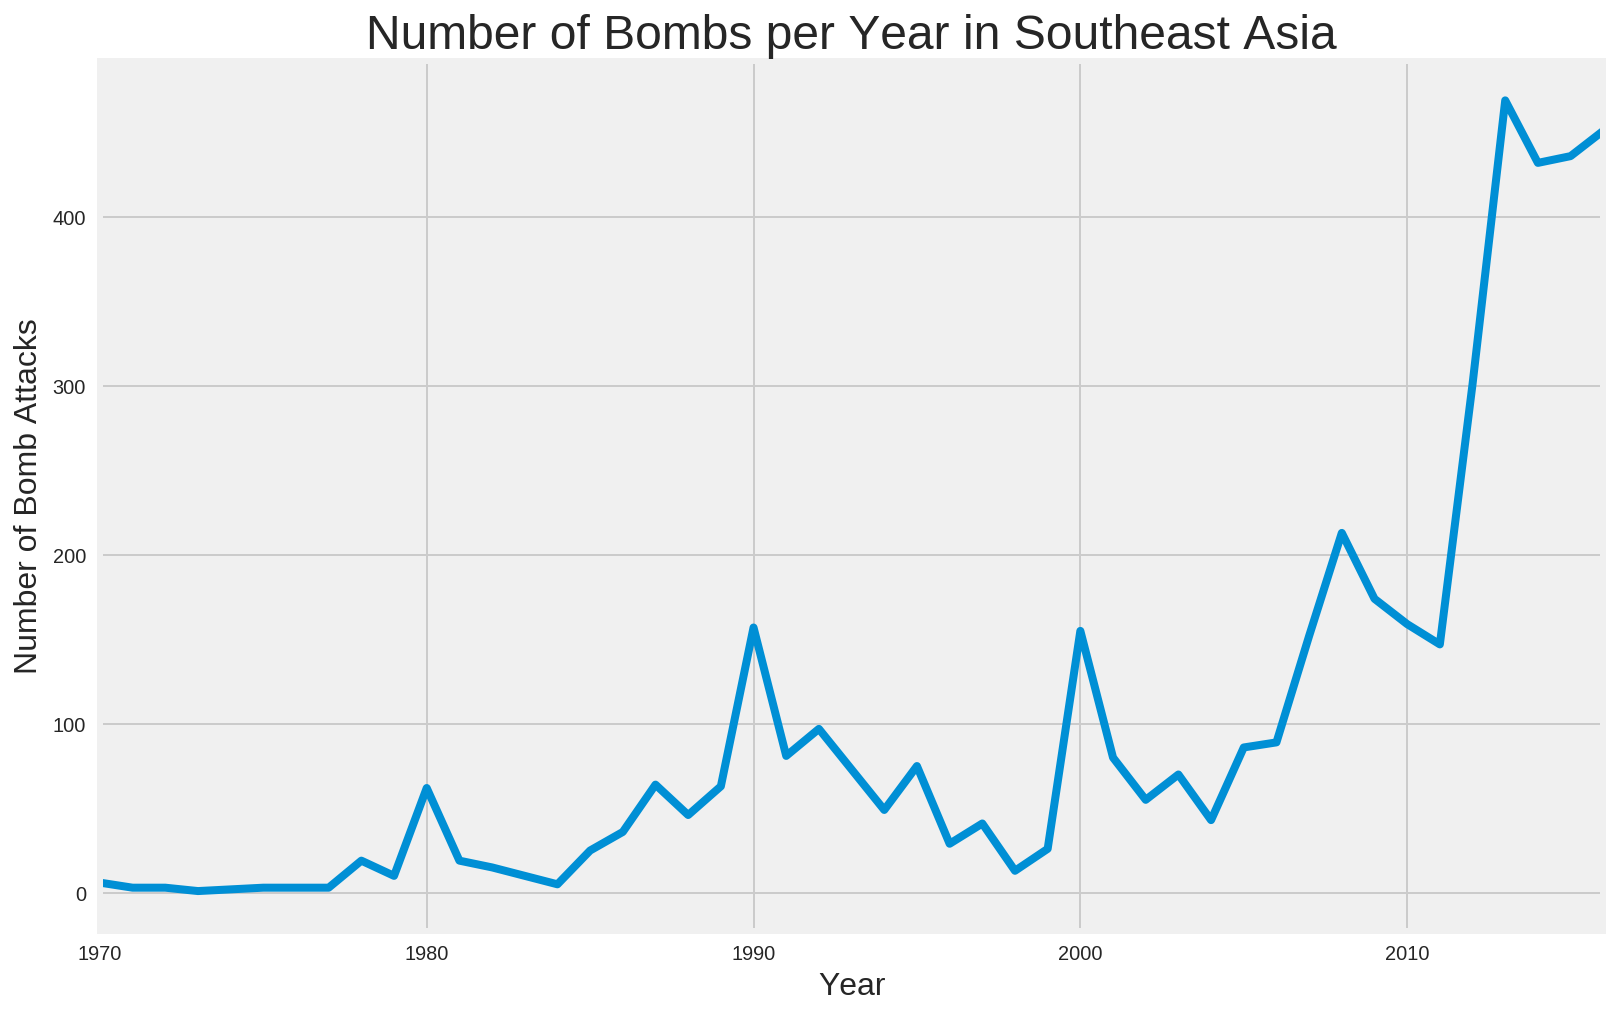

In [97]:
plt.figure(figsize = (12, 8))
se_asia_data_bombing.groupby('iyear').count().attacktype1.plot(kind='line', )
plt.title('Number of Bombs per Year in Southeast Asia', fontsize= 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Bomb Attacks', fontsize = 16);

In [103]:
se_asia_data.country_txt.unique()

array(['Philippines', 'Cambodia', 'South Vietnam', 'Thailand', 'Myanmar',
       'Malaysia', 'Singapore', 'Indonesia', 'Laos', 'Brunei', 'Vietnam',
       'East Timor'], dtype=object)

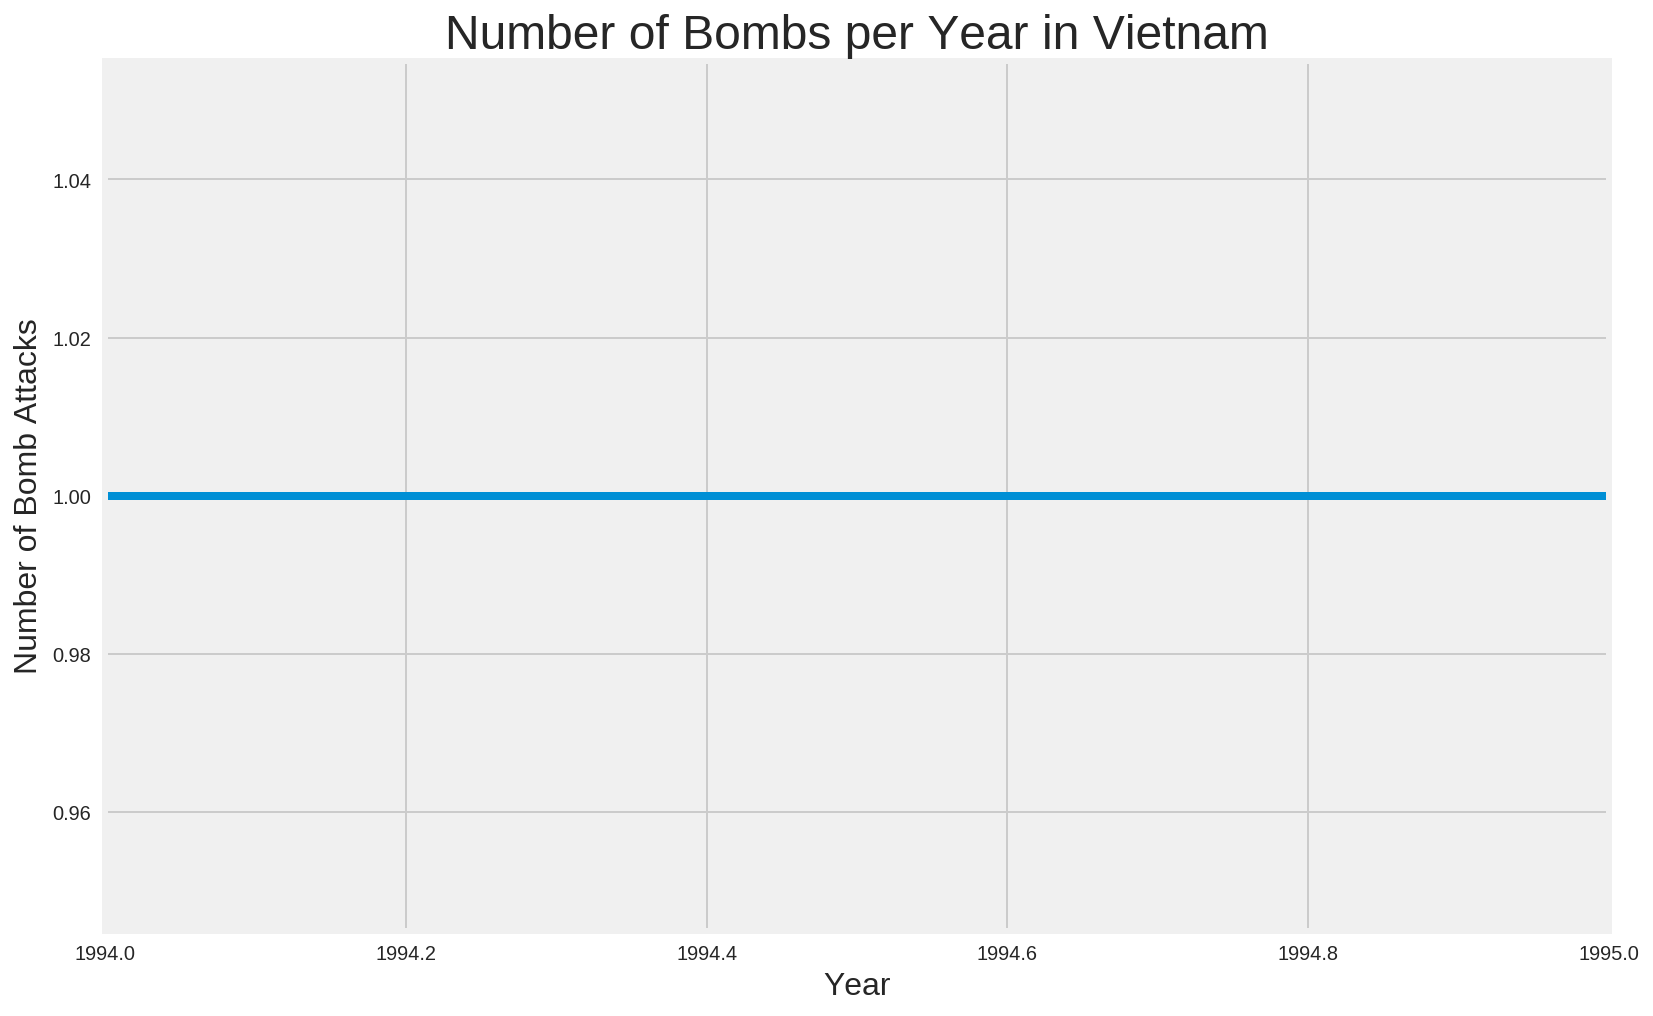

In [106]:
vietnam = se_asia_data[se_asia_data['country'] == 223]
vietnam_bombing = vietnam[vietnam['attacktype1_txt'] == 'Bombing/Explosion'].reset_index(drop = True)
plt.figure(figsize = (12, 8))
vietnam_bombing.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Bombs per Year in Vietnam', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Bomb Attacks', fontsize = 16);

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1972.0, right=1972.0
  'left=%s, right=%s') % (left, right))


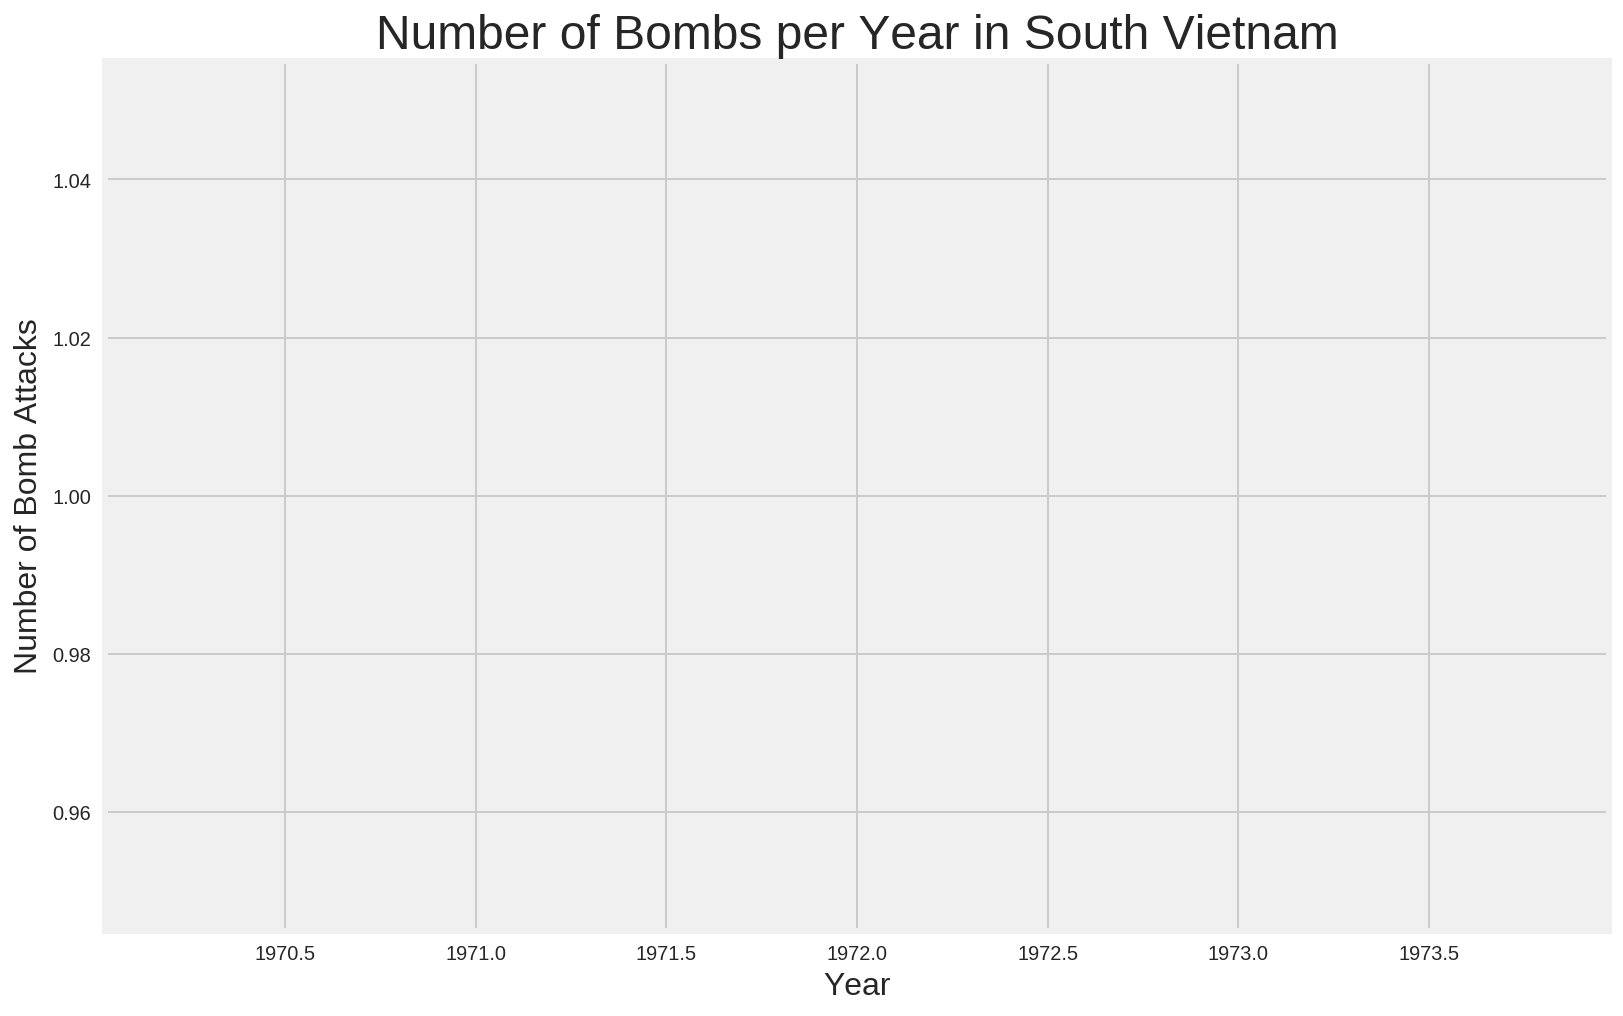

In [109]:
s_vietnam = se_asia_data[se_asia_data['country'] == 428]
s_vietnam_bombing = s_vietnam[s_vietnam['attacktype1_txt'] == 'Bombing/Explosion'].reset_index(drop = True)
plt.figure(figsize = (12, 8))
s_vietnam_bombing.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Bombs per Year in South Vietnam', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Bomb Attacks', fontsize = 16);

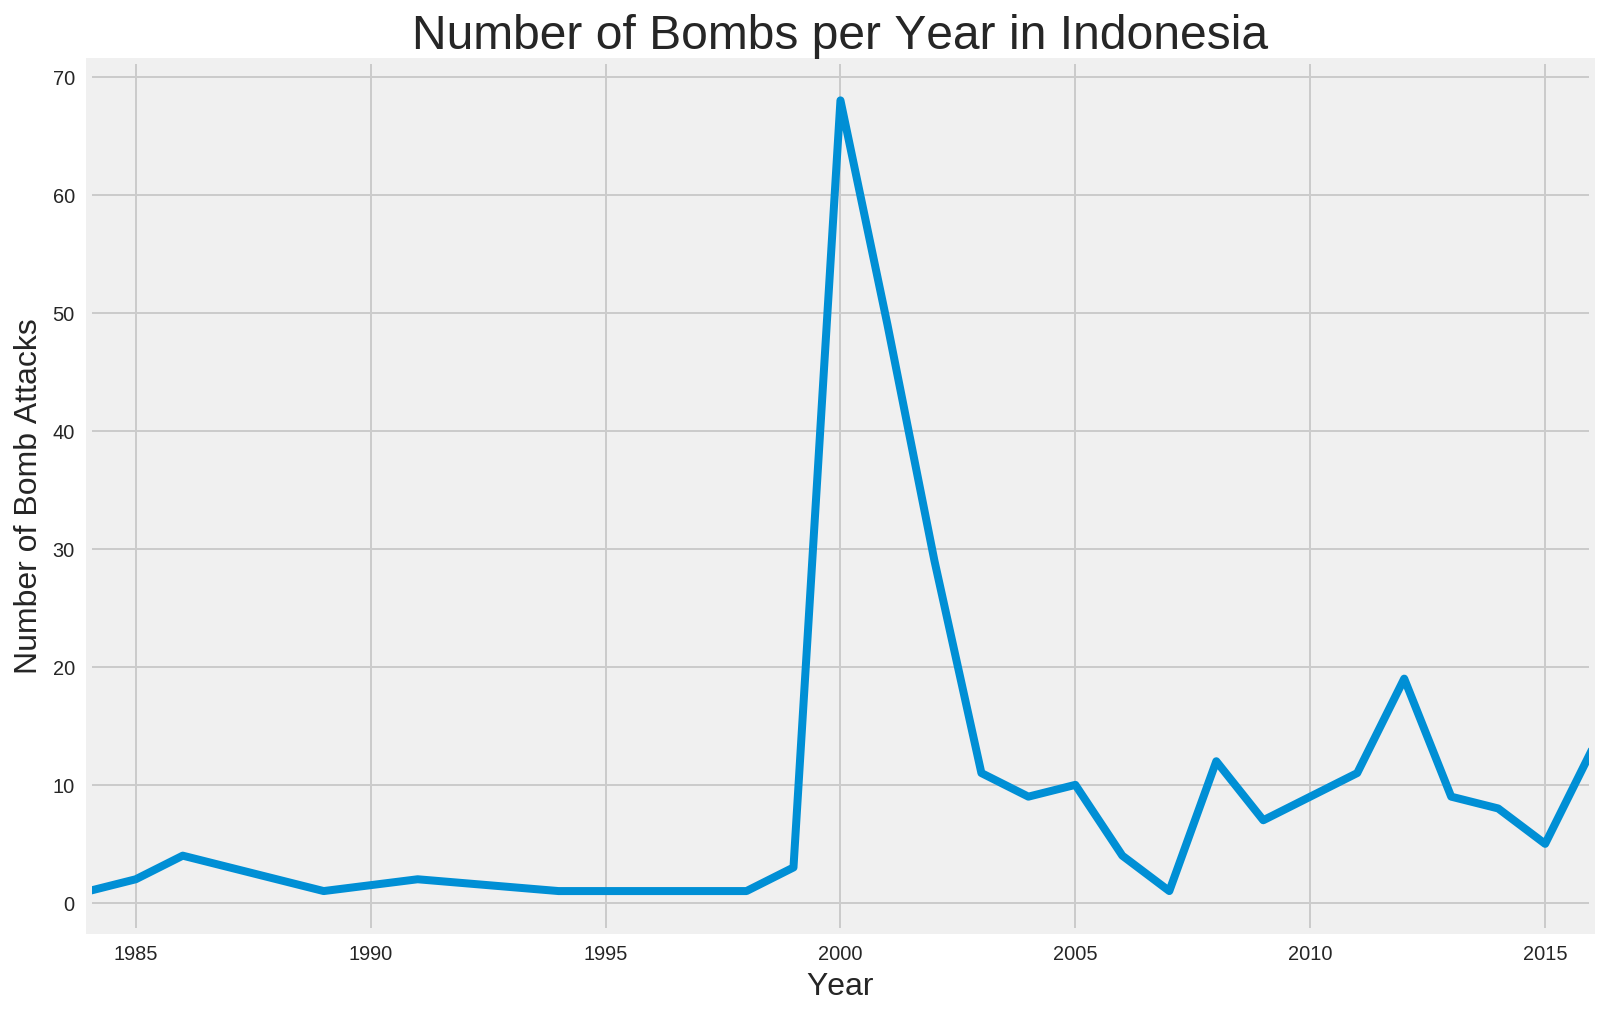

In [110]:
indonesia = se_asia_data[se_asia_data['country'] == 93]
indonesia_bombing = indonesia[indonesia['attacktype1_txt'] == 'Bombing/Explosion'].reset_index(drop = True)
plt.figure(figsize = (12, 8))
indonesia_bombing.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Bombs per Year in Indonesia', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Bomb Attacks', fontsize = 16);

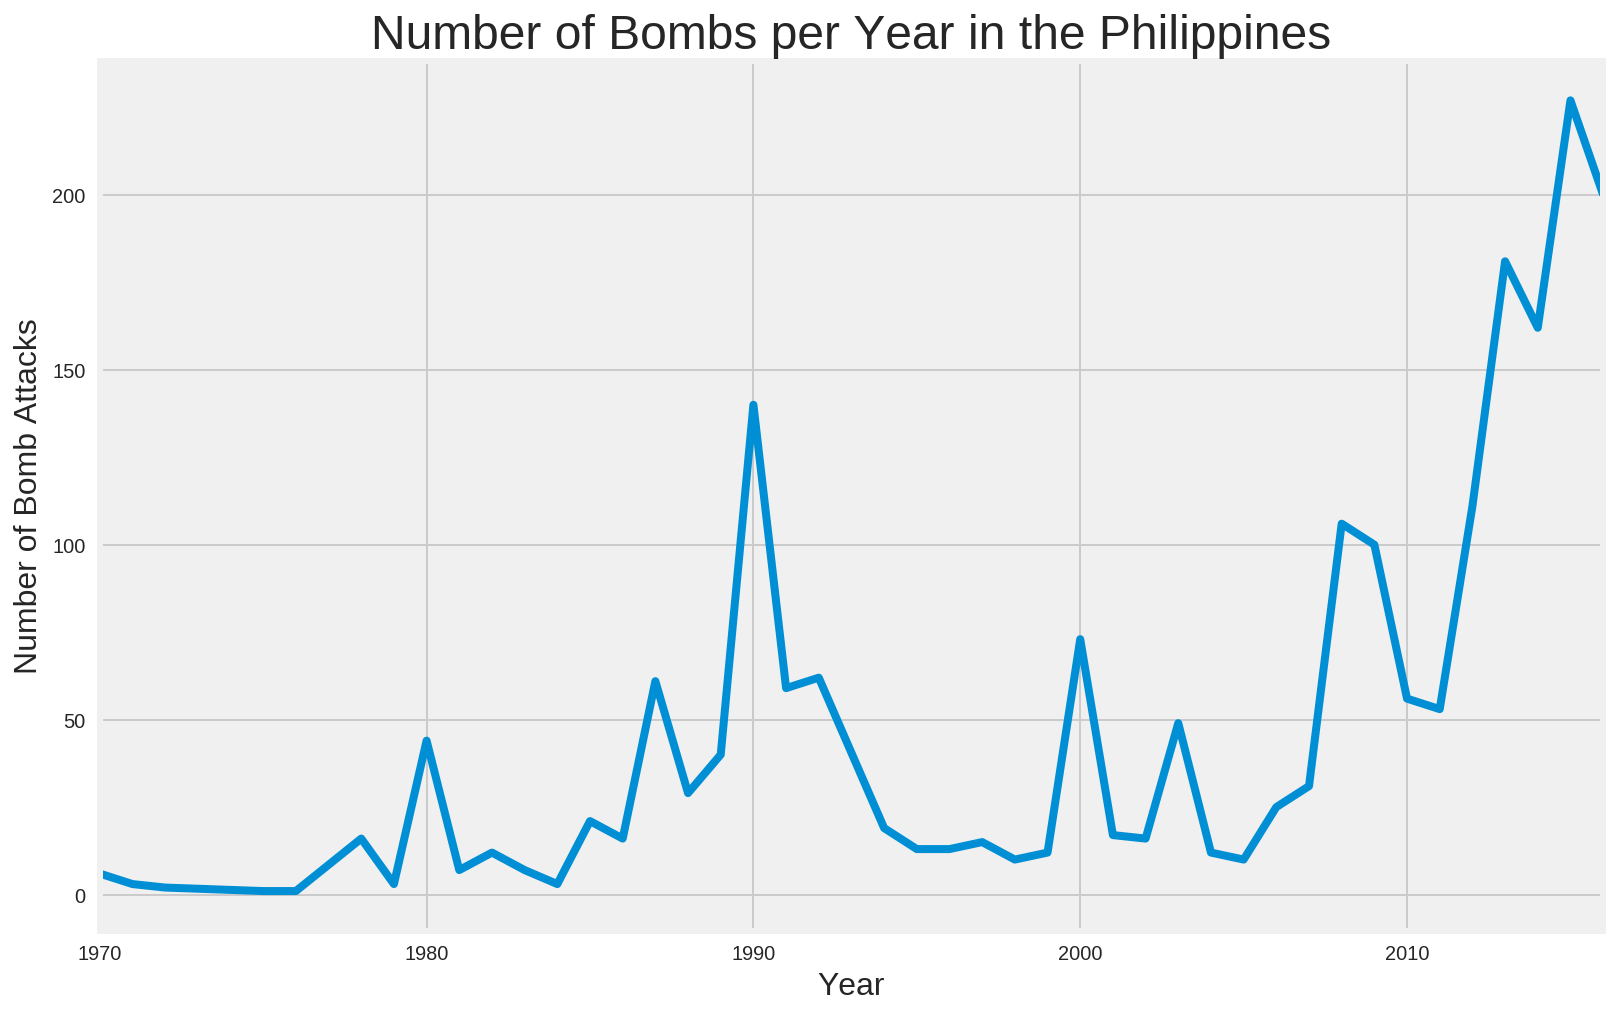

In [111]:
phil = se_asia_data[se_asia_data['country'] == 160]
phil_bombing = phil[phil['attacktype1_txt'] == 'Bombing/Explosion'].reset_index(drop = True)
plt.figure(figsize = (12, 8))
phil_bombing.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Bombs per Year in the Philippines', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Bomb Attacks', fontsize = 16);

#### Will only be looking at countries over a 100 incidents

In [112]:
se_asia_data.country_txt.value_counts(dropna = False)

Philippines      6212
Thailand         3668
Indonesia         735
Myanmar           430
Cambodia          258
Malaysia           95
Laos               26
Vietnam            10
East Timor         10
Singapore           7
Brunei              1
South Vietnam       1
Name: country_txt, dtype: int64

- philippines = 160
- thailand = 205
- indoensia = 93
- myanmar = 138
- cambodia = 36

In [113]:
philippines = se_asia_data[se_asia_data['country'] == 160]
thailand = se_asia_data[se_asia_data['country'] == 205]
indonesia = se_asia_data[se_asia_data['country'] == 93]
myanmar = se_asia_data[se_asia_data['country'] == 138]
cambodia = se_asia_data[se_asia_data['country'] == 36]

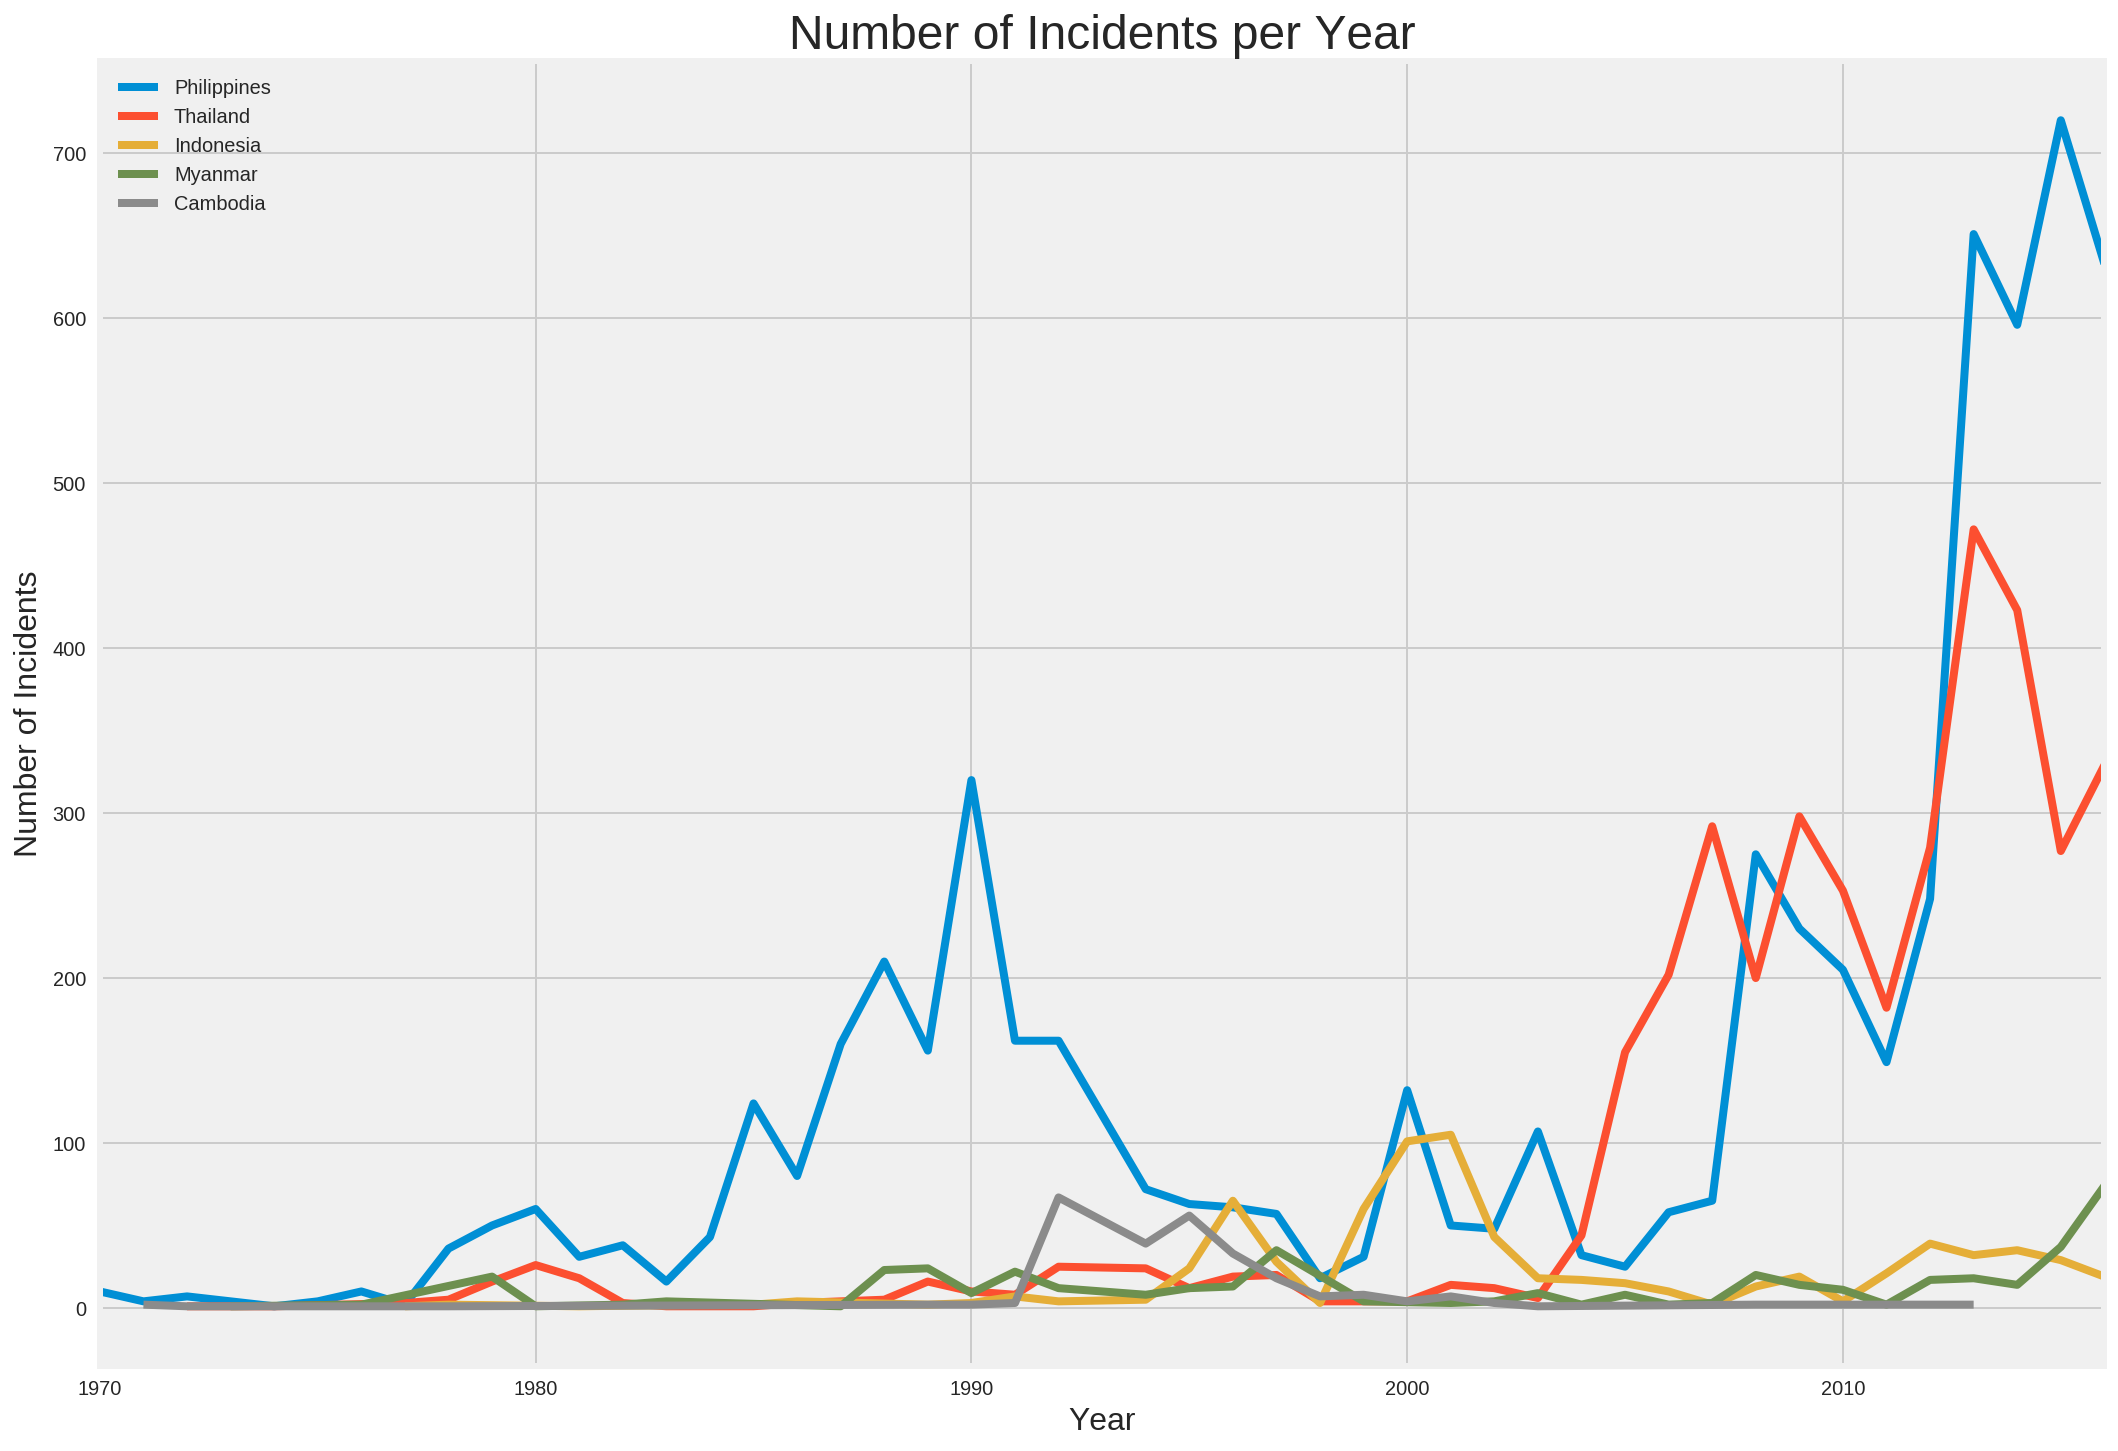

In [114]:
plt.figure(figsize = (16, 12))
philippines.groupby('iyear').count().attacktype1.plot(kind='line')
thailand.groupby('iyear').count().attacktype1.plot(kind='line')
indonesia.groupby('iyear').count().attacktype1.plot(kind='line')
myanmar.groupby('iyear').count().attacktype1.plot(kind='line')
cambodia.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Incidents per Year', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Number of Incidents', fontsize = 16)
plt.legend(['Philippines', 'Thailand', 'Indonesia', 'Myanmar', 'Cambodia']);

#### Some interesting trends, we see that the Philippines and Thailand follow a very similar pattern post 2000's and a huge uptick in recent years. We also see a pretty big uptick in the 2000 for Indoensia and a slight increase between 1990 and 200 for Cambodia. Myanmar stays relatively low. 

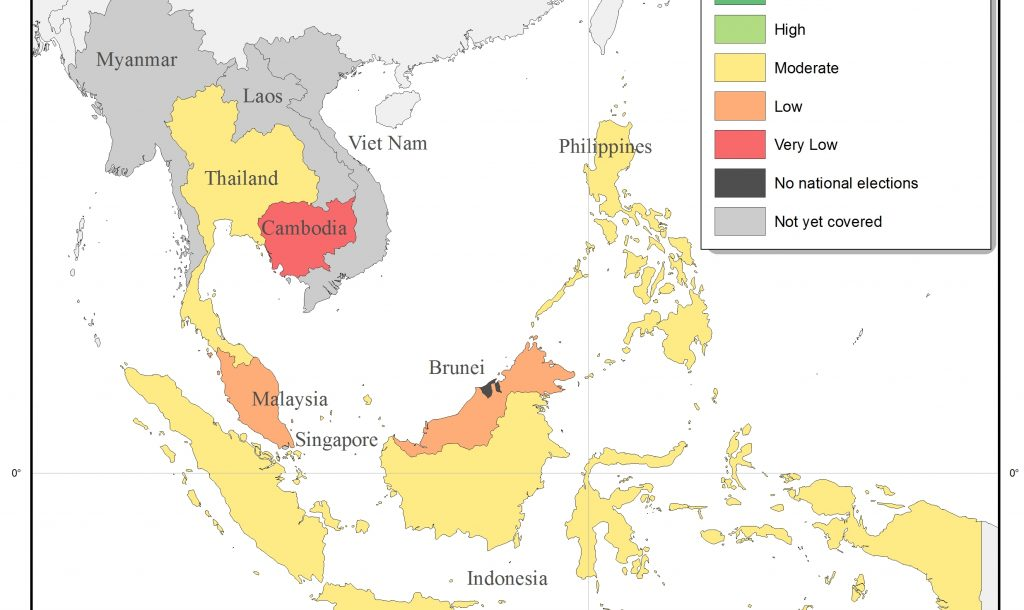

#### Only gonna look at past 1994

In [115]:
philippines_post94 = philippines.query("iyear > 1994").reset_index(drop = True)
thailand_post94 = thailand.query("iyear > 1994").reset_index(drop = True)
indonesia_post94 = indonesia.query("iyear > 1994").reset_index(drop = True)
myanmar_post94 = myanmar.query("iyear > 1994").reset_index(drop = True)
cambodia_post94 = cambodia.query("iyear > 1994").reset_index(drop = True)

#### Dropping the nulls very small percentage

In [116]:
philippines_post94.nkill.dropna(inplace = True)
thailand_post94.nkill.dropna(inplace = True)
indonesia_post94.nkill.dropna(inplace = True)
myanmar_post94.nkill.dropna(inplace = True)
cambodia_post94.nkill.dropna(inplace = True)

In [117]:
philippines_post94
thailand_post94
indonesia_post94
myanmar_post94
cambodia_post94

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199501020007,1995,1,2,NaN,0,NaN,36,Cambodia,5,Southeast Asia,NaN,Tbeng Rhpuos Kam Pong Chnnang Province,NaN,NaN,5.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19,Transportation,100.0,Train/Train Tracks/Trolley,Unknown,Train/Passengers,36.0,Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khmer Rouge,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,8.0,Land Mine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mine,8.0,NaN,NaN,36.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,199501150005,1995,1,15,NaN,0,NaN,36,Cambodia,5,Southeast Asia,NaN,Angkor,11.558831,104.083333,1.0,1,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,18,Tourists,96.0,Tour Bus/Van,Tourists,Van carrying tourists,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khmer Rouge,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,7.0,Grenade,5.0,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenade; Automatic firearm,2.0,1.0,NaN,1.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,199503050007,1995,3,5,NaN,0,NaN,36,Cambodia,5,Southeast Asia,NaN,Unknown,NaN,NaN,5.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Govt.,Border Patrol,205.0,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bandits,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firearm,2.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Cambodia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,199503110008,1995,3,11,NaN,0,NaN,36,Cambodia,5,Southeast Asia,NaN,"sneung V., Battambang Province",12.960671,103.049309,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Govt,Residents,36.0,Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Khmer Rouge,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,31.0,

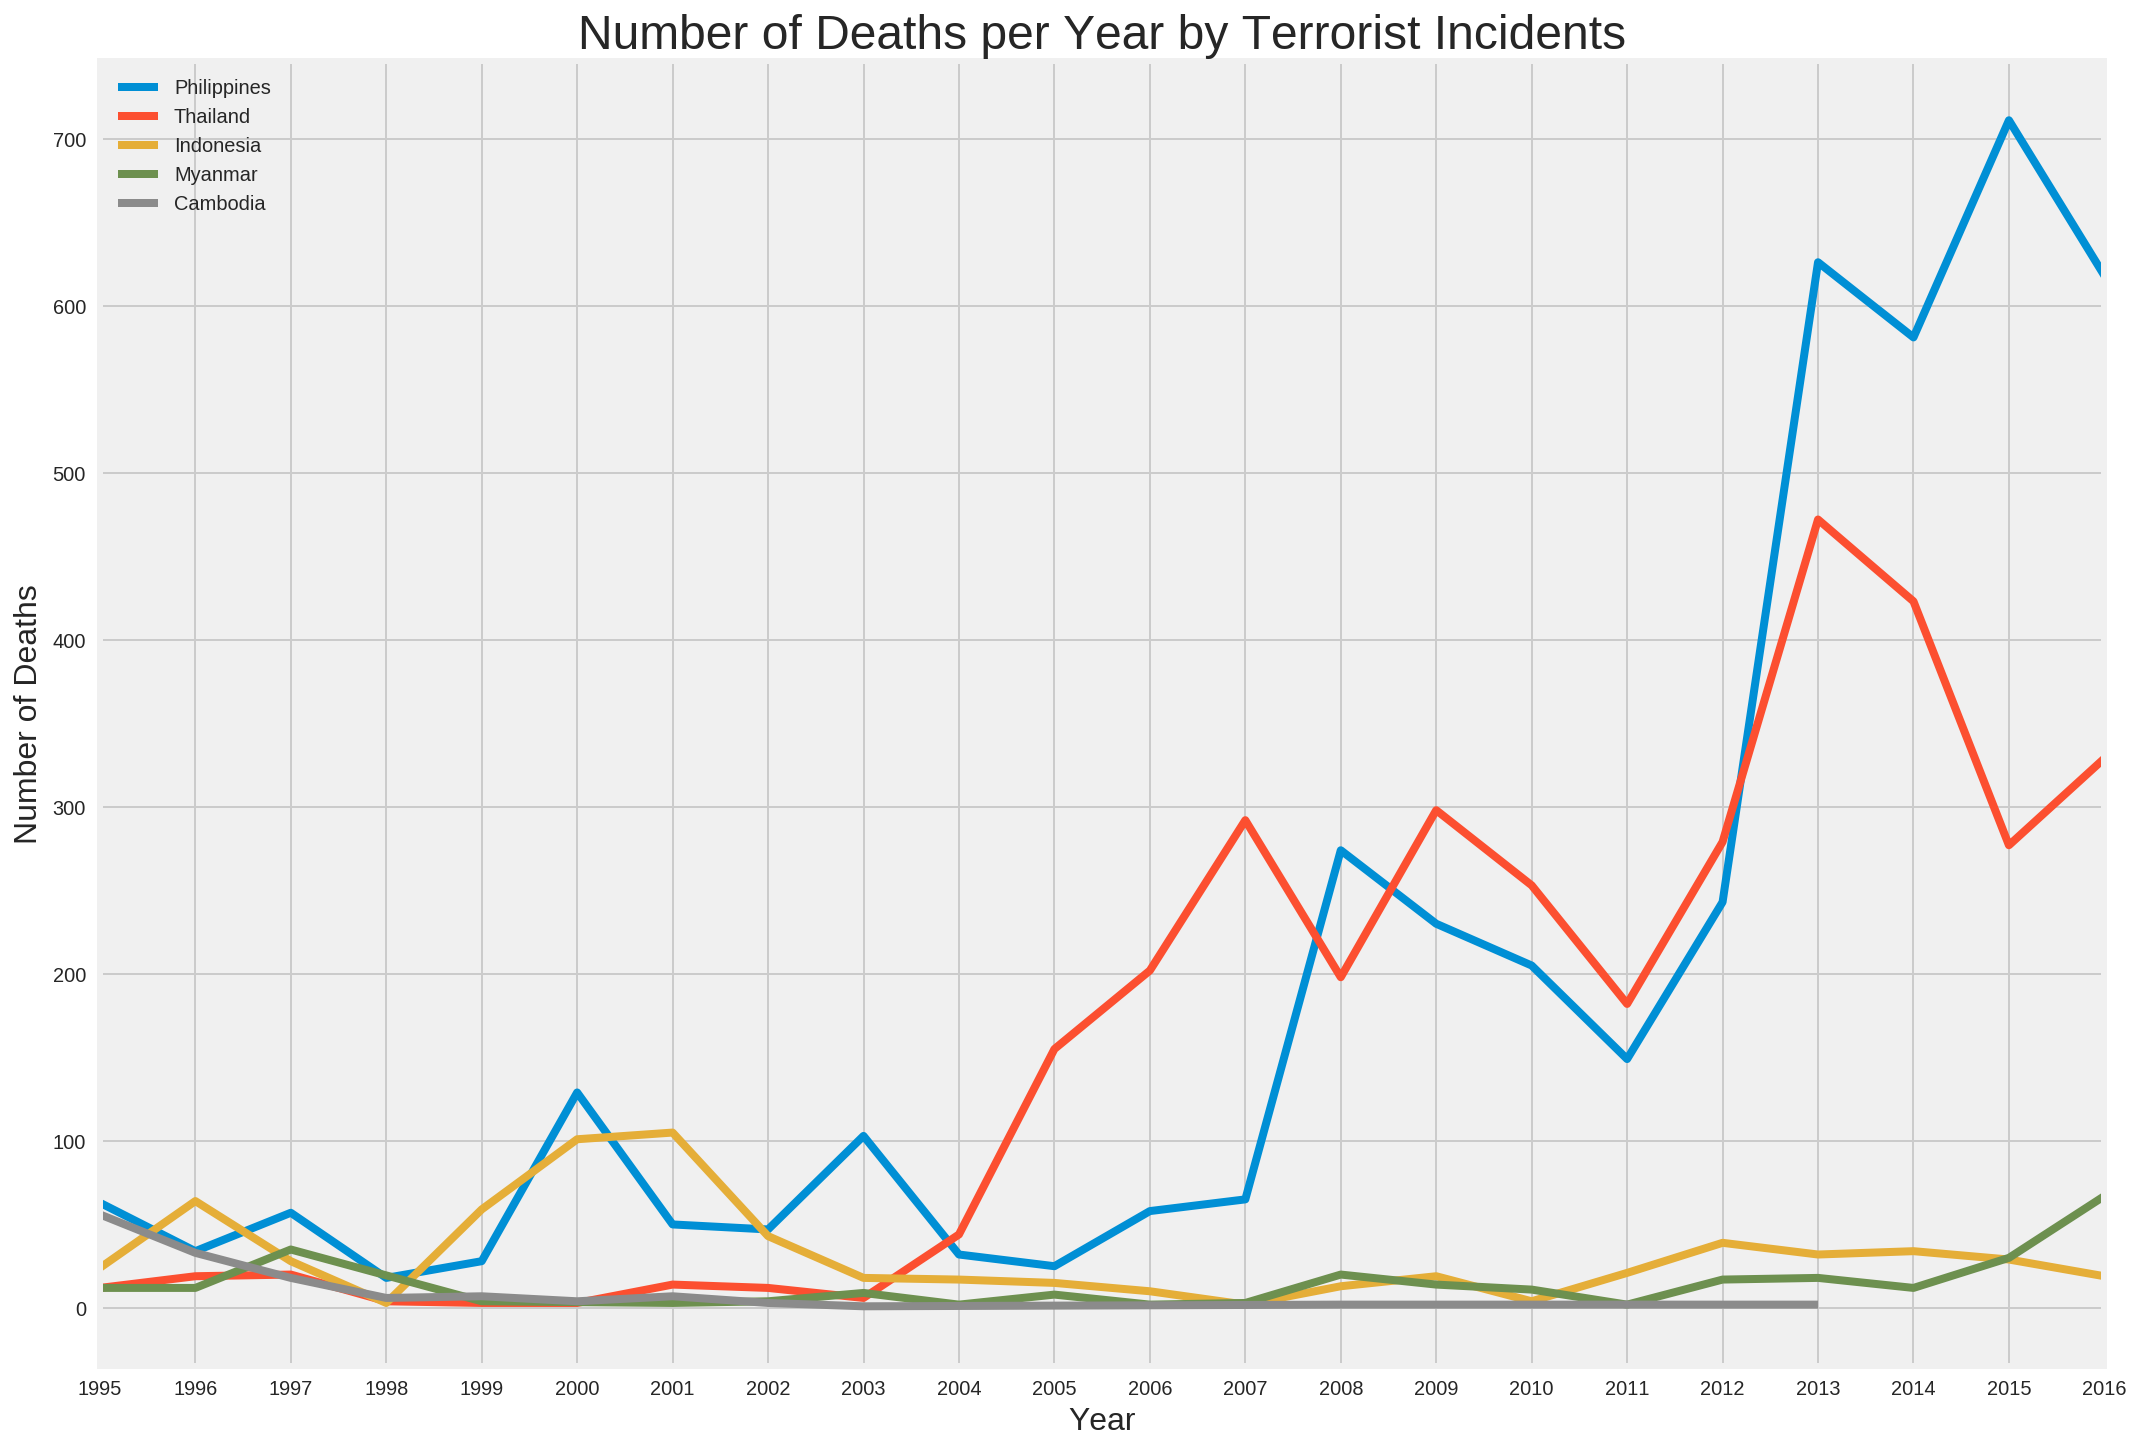

In [119]:
plt.figure(figsize = (16, 12))
philippines_post94.groupby('iyear').count().nkill.plot(kind='line')
thailand_post94.groupby('iyear').count().nkill.plot(kind='line')
indonesia_post94.groupby('iyear').count().nkill.plot(kind='line')
myanmar_post94.groupby('iyear').count().nkill.plot(kind='line')
cambodia_post94.groupby('iyear').count().nkill.plot(kind='line')
plt.title('Number of Deaths per Year by Terrorist Incidents', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.xticks(np.arange(1995, 2017))
plt.ylabel('Number of Deaths', fontsize = 16)
plt.legend(['Philippines', 'Thailand', 'Indonesia', 'Myanmar', 'Cambodia']);

#### Taking a closer look the number of incidents go to zero for Camodia past 2013

In [37]:
philippines_nkill = philippines_post94.nkill.values
thailand_nkill = thailand_post94.nkill.values
indonesia_nkill = indonesia_post94.nkill.values
myanmar_nkill = myanmar_post94.nkill.values
cambodia_nkill = cambodia_post94.nkill.values

In [20]:
se_asia_five_nkill = se_asia_data[((se_asia_data['country'] == 160) | (se_asia_data['country'] == 205) | (se_asia_data['country'] ==93) |\
            (se_asia_data['country'] ==138) |(se_asia_data['country'] ==36)) & (se_asia_data['iyear'] >1994)].nkill.dropna()

In [21]:
prior_mean_se_asia = se_asia_five_nkill.mean()
prior_std_se_asia = se_asia_five_nkill.std()

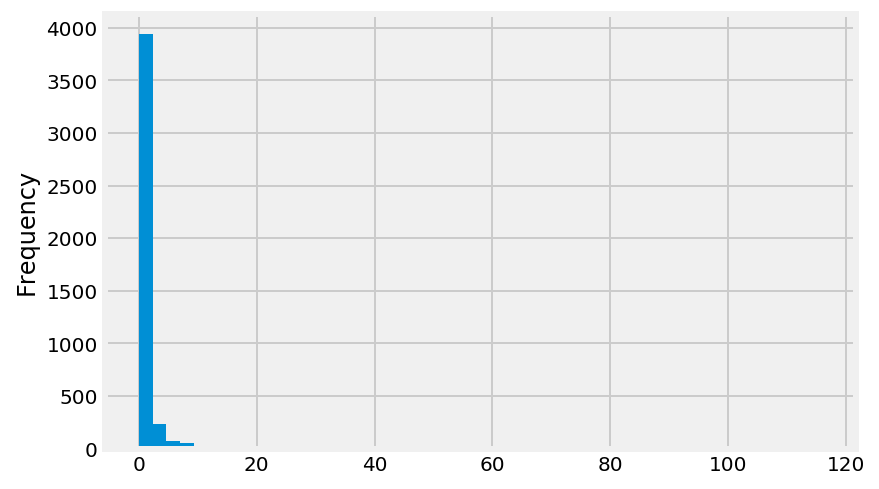

In [22]:
philippines_post94.nkill.plot(kind = 'hist', bins = 50)

### We will compare the 4 countries with the Philippines

In [23]:
import pymc3 as pm

#### Philippines with Thailand

In [24]:
with pm.Model() as model:
    philippines_mean = pm.Normal('philippines_mean', prior_mean_se_asia, sd  = 50)
    thailand_mean = pm.Normal('thailand_mean', prior_mean_se_asia, sd  = 50)
    
    philippines_std = pm.Gamma('philippines_std', mu = prior_std_se_asia, sd = 50)
    thailand_std = pm.Gamma('thailand_std', mu = prior_std_se_asia, sd = 50)
    
    philip_nkill = pm.Normal('philip_nkill', mu = philippines_mean, sd = philippines_std, observed = philippines_nkill)
    thai_nkill = pm.Normal('thai_nkill', mu = thailand_mean, sd = thailand_std, observed = thailand_nkill)

    mean_delta = pm.Deterministic('mean_delta', philippines_mean - thailand_mean)
    std_delta = pm.Deterministic('std_delta', philippines_std - thailand_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((philippines_std**2 + thailand_std**2)/2))

In [25]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start = start, step = step, njob = 4)

logp = -16,853, ||grad|| = 1.3403: 100%|██████████████████████████████████████████████| 14/14 [00:00<00:00, 560.21it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [thailand_std_log__, philippines_std_log__, thailand_mean, philippines_mean]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDD028F28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDCF4D0F0>], dtype=object)

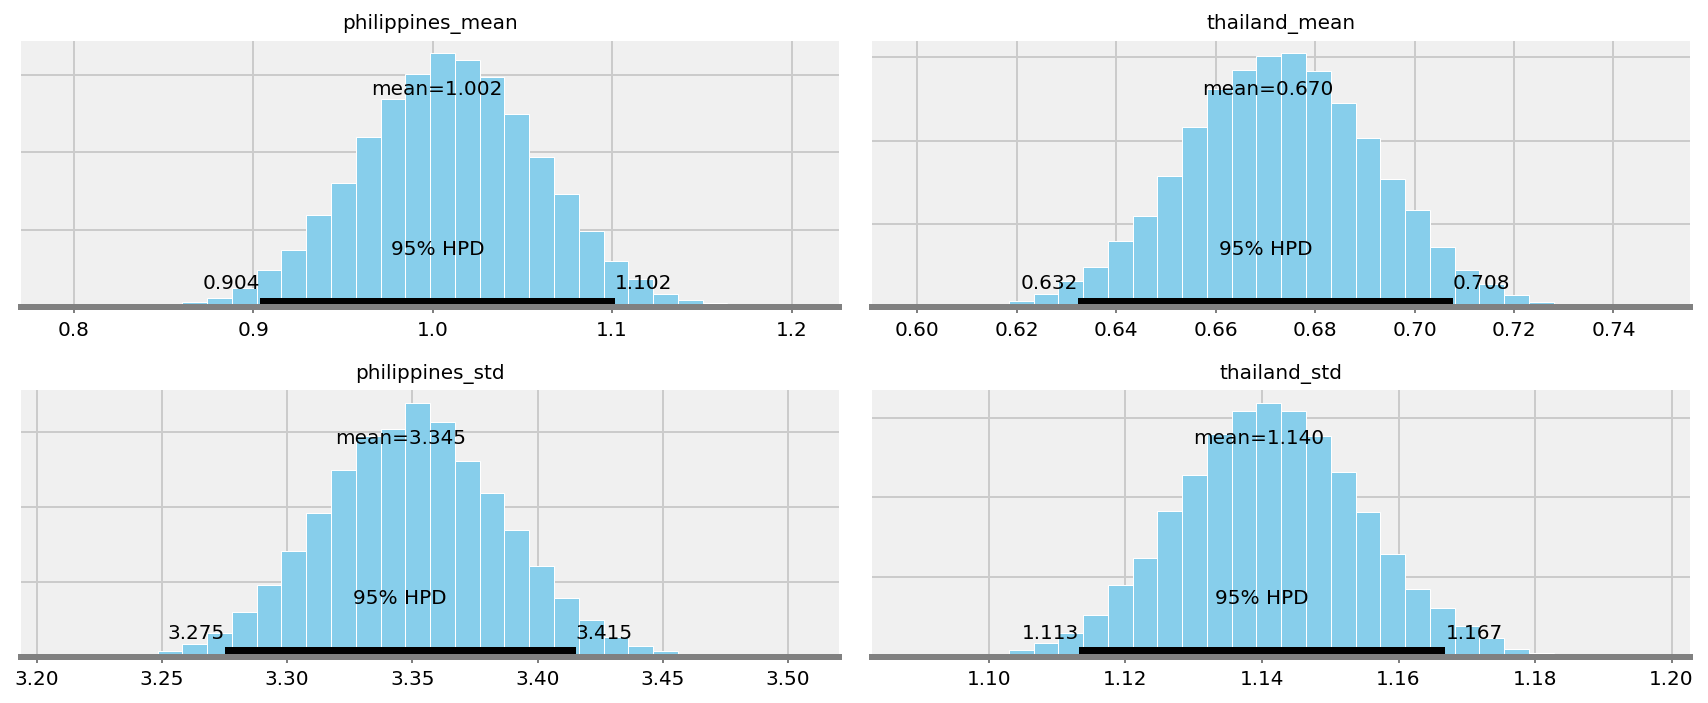

In [26]:
pm.plot_posterior(trace[5000::3],
                  varnames=['philippines_mean', 'thailand_mean',
                            'philippines_std', 'thailand_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDD3D4B70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDCF1E780>], dtype=object)

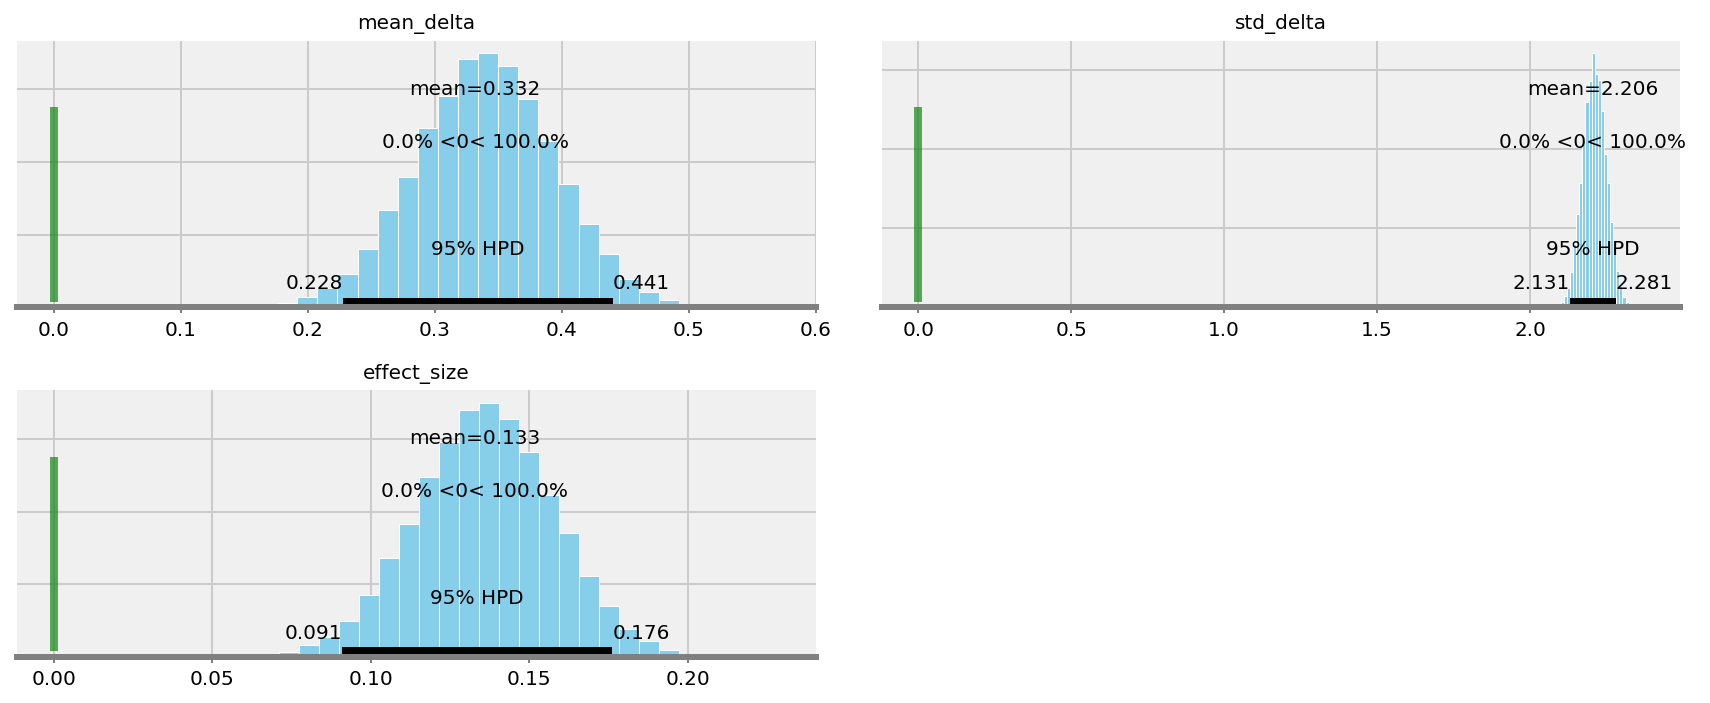

In [27]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

Lookin at our mean delta we can see that there is a difference between the number of deaths for the 2 countries after 1994

#### Philippines with Indonesia

In [28]:
with pm.Model() as model:
    philippines_mean = pm.Normal('philippines_mean', prior_mean_se_asia, sd  = 50)
    indonesia_mean = pm.Normal('indonesia_mean', prior_mean_se_asia, sd  = 50)
    
    philippines_std = pm.Gamma('philippines_std', mu = prior_std_se_asia, sd = 50)
    indonesia_std = pm.Gamma('indonesia_std', mu = prior_std_se_asia, sd = 50)
    
    philip_nkill = pm.Normal('philip_nkill', mu = philippines_mean, sd = philippines_std, observed = philippines_nkill)
    indo_nkill = pm.Normal('indo_nkill', mu = indonesia_mean, sd = indonesia_std, observed = indonesia_nkill)
    
    mean_delta = pm.Deterministic('mean_delta', philippines_mean - indonesia_mean)
    std_delta = pm.Deterministic('std_delta', philippines_std - indonesia_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((philippines_std**2 + indonesia_std**2)/2))

In [29]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start = start, step = step, njob = 4)

logp = -13,711, ||grad|| = 17.695: 100%|██████████████████████████████████████████████| 18/18 [00:00<00:00, 750.23it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [indonesia_std_log__, philippines_std_log__, indonesia_mean, philippines_mean]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDCD7F860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDCCF9A20>], dtype=object)

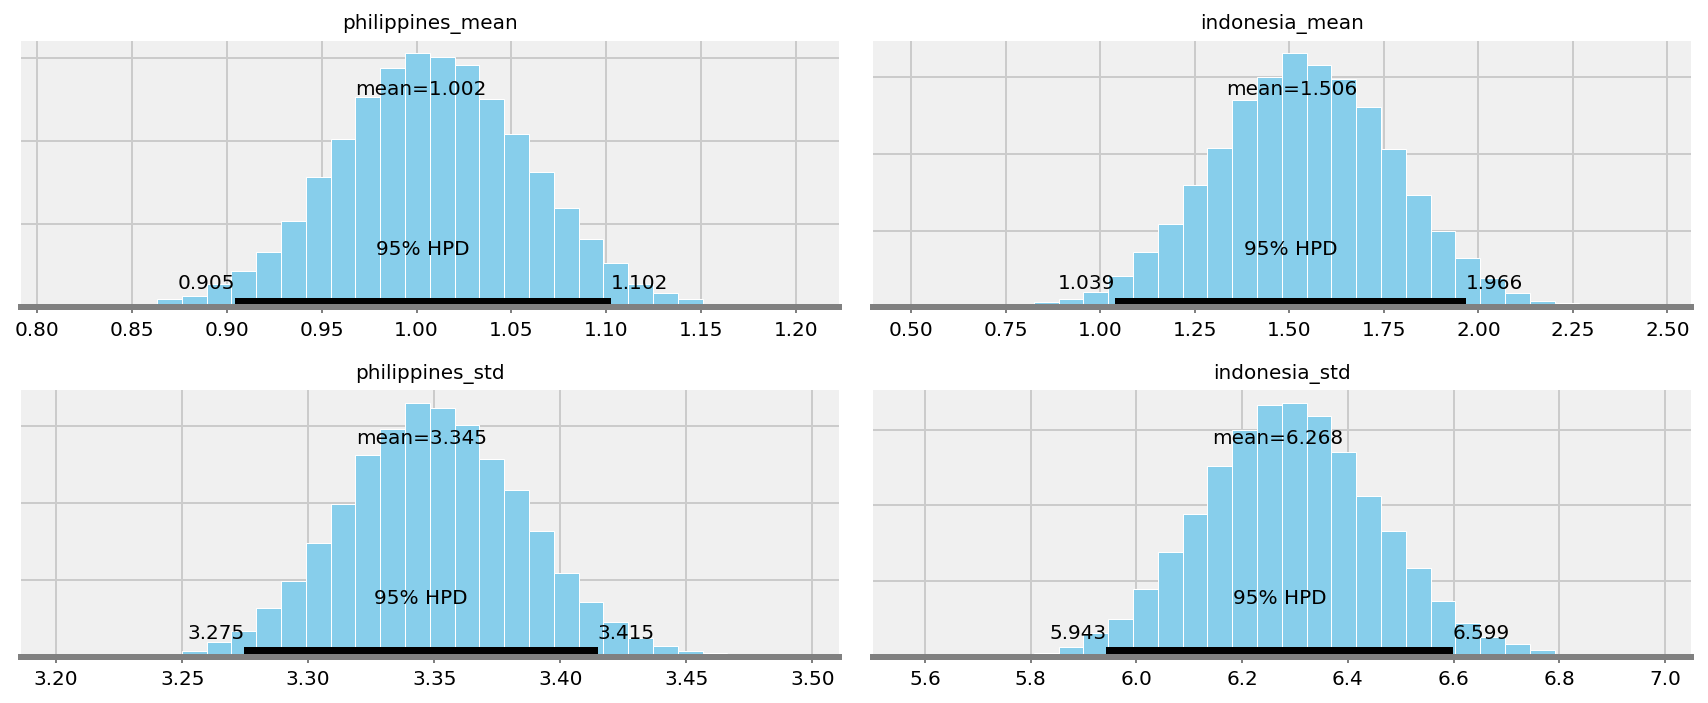

In [30]:
pm.plot_posterior(trace[5000::3],
                  varnames=['philippines_mean', 'indonesia_mean',
                            'philippines_std', 'indonesia_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDEE49C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDEE58B70>], dtype=object)

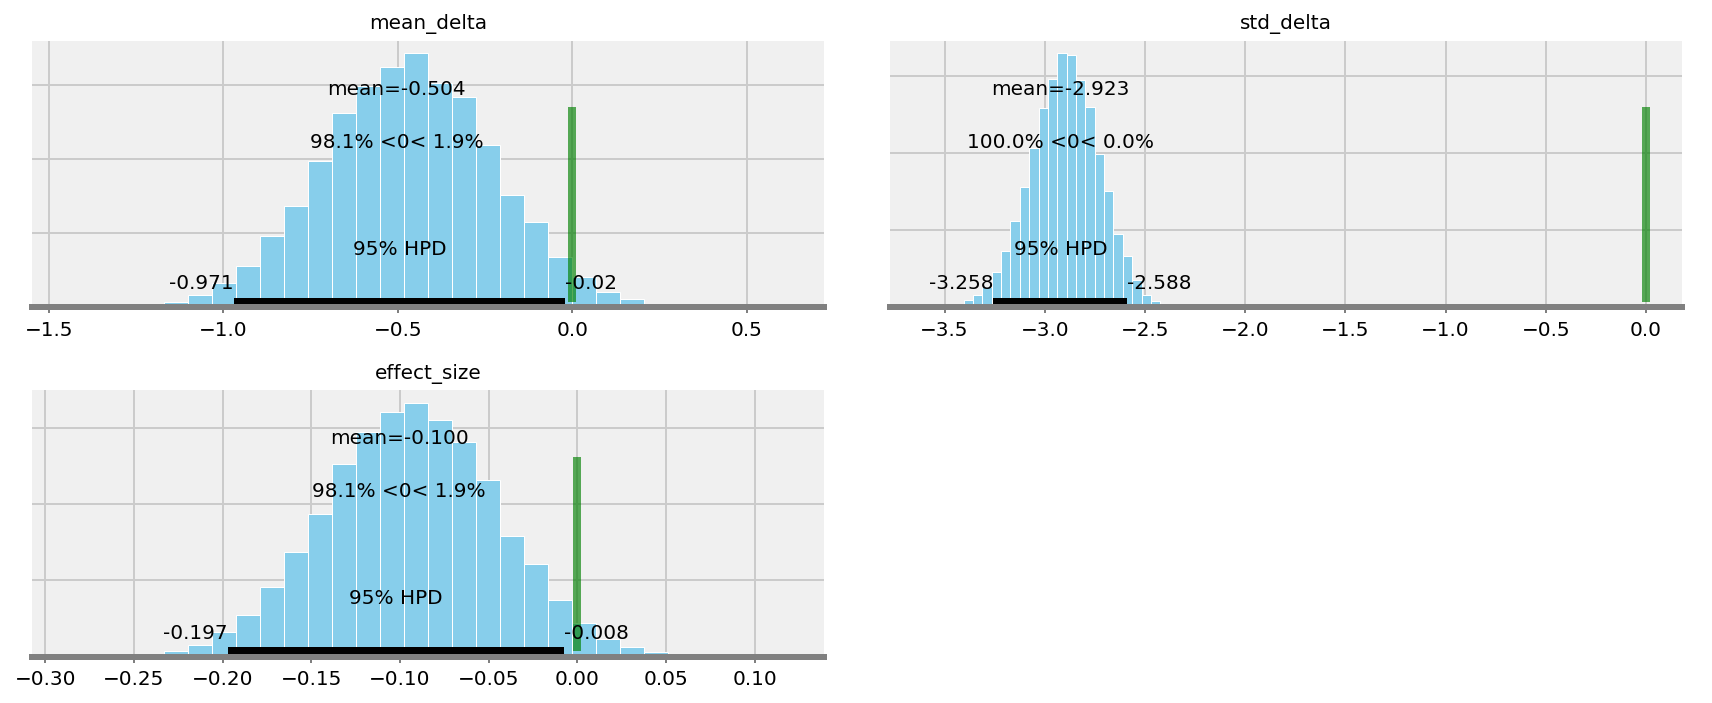

In [31]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

We can say that we are pretty confident that the number of fatalaties is significantly different post 1994 for the two countries

#### Philippines with Myanmar

In [32]:
with pm.Model() as model:
    philippines_mean = pm.Normal('philippines_mean', prior_mean_se_asia, sd  = 50)
    myanmar_mean = pm.Normal('myanmar_mean', prior_mean_se_asia, sd  = 50)
    
    philippines_std = pm.Gamma('philippines_std', mu = prior_std_se_asia, sd = 50)
    myanmar_std = pm.Gamma('myanmar_std', mu = prior_std_se_asia, sd = 50)
    
    philip_nkill = pm.Normal('philip_nkill', mu = philippines_mean, sd = philippines_std, observed = philippines_nkill)
    myan_nkill = pm.Normal('myan_nkill', mu = myanmar_mean, sd = myanmar_std, observed = myanmar_nkill)
    
    mean_delta = pm.Deterministic('mean_delta', philippines_mean - myanmar_mean)
    std_delta = pm.Deterministic('std_delta', philippines_std - myanmar_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((philippines_std**2 + myanmar_std**2)/2))

In [33]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start = start, step = step, njob = 4)

logp = -12,222, ||grad|| = 33.492: 100%|██████████████████████████████████████████████| 18/18 [00:00<00:00, 899.89it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [myanmar_std_log__, philippines_std_log__, myanmar_mean, philippines_mean]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDFEF1D30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDE9ED9B0>], dtype=object)

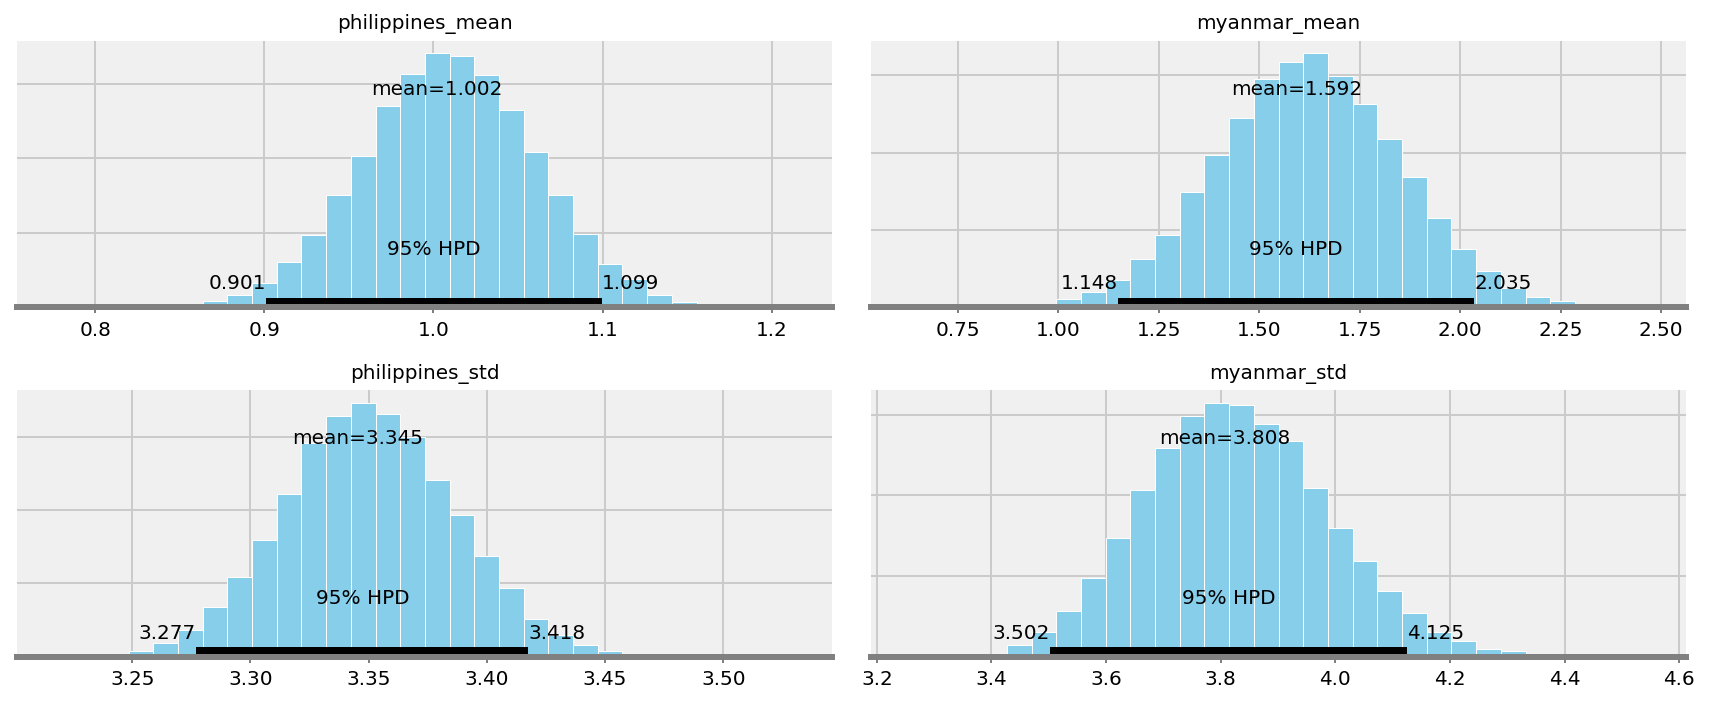

In [34]:
pm.plot_posterior(trace[5000::3],
                  varnames=['philippines_mean', 'myanmar_mean',
                            'philippines_std', 'myanmar_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDFF0A208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDFF2DD30>], dtype=object)

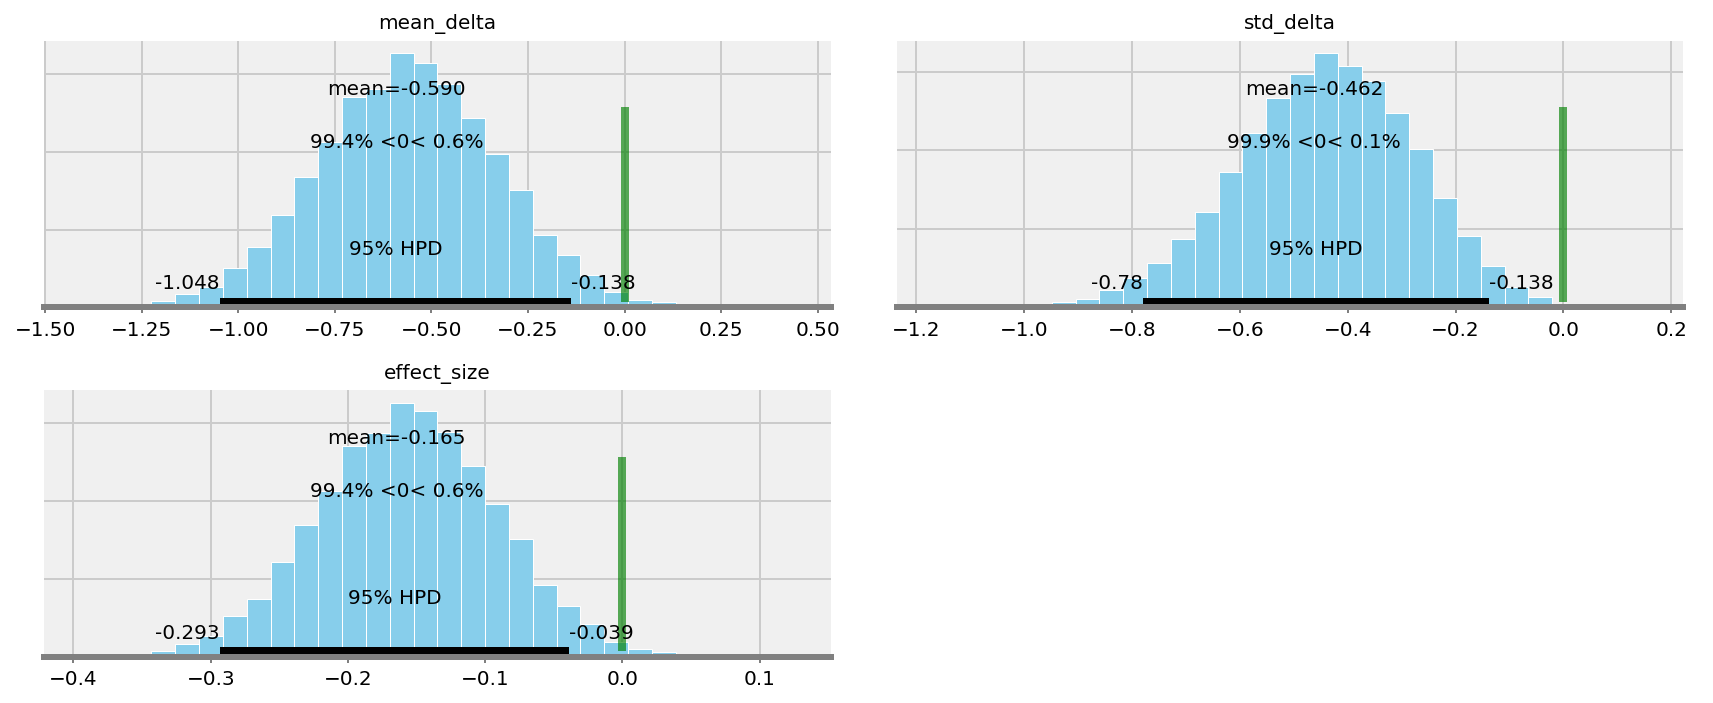

In [35]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

Similair the mean delta has a 95% interval between -1.048 and -0.138, which indicates that there is a difference in kills by terrorist attacks

#### Philippines with Cambodia

In [38]:
with pm.Model() as model:
    philippines_mean = pm.Normal('philippines_mean', prior_mean_se_asia, sd  = 50)
    cambodia_mean = pm.Normal('cambodia_mean', prior_mean_se_asia, sd  = 50)
    
    philippines_std = pm.Gamma('philippines_std', mu = prior_std_se_asia, sd = 50)
    cambodia_std = pm.Gamma('cambodia_std', mu = prior_std_se_asia, sd = 50)
    
    philip_nkill = pm.Normal('philip_nkill', mu = philippines_mean, sd = philippines_std, observed = philippines_nkill)
    cambod_nkill = pm.Normal('cambod_nkill', mu = cambodia_mean, sd = cambodia_std, observed = cambodia_nkill)
    
    mean_delta = pm.Deterministic('mean_delta', philippines_mean - cambodia_mean)
    std_delta = pm.Deterministic('std_delta', philippines_std - cambodia_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((philippines_std**2 + cambodia_std**2)/2))

In [39]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start = start, step = step, njob = 4)

logp = -11,860, ||grad|| = 0.0077155: 100%|███████████████████████████████████████████| 22/22 [00:00<00:00, 814.77it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [cambodia_std_log__, philippines_std_log__, cambodia_mean, philippines_mean]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDCEEDEF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDEF4A240>], dtype=object)

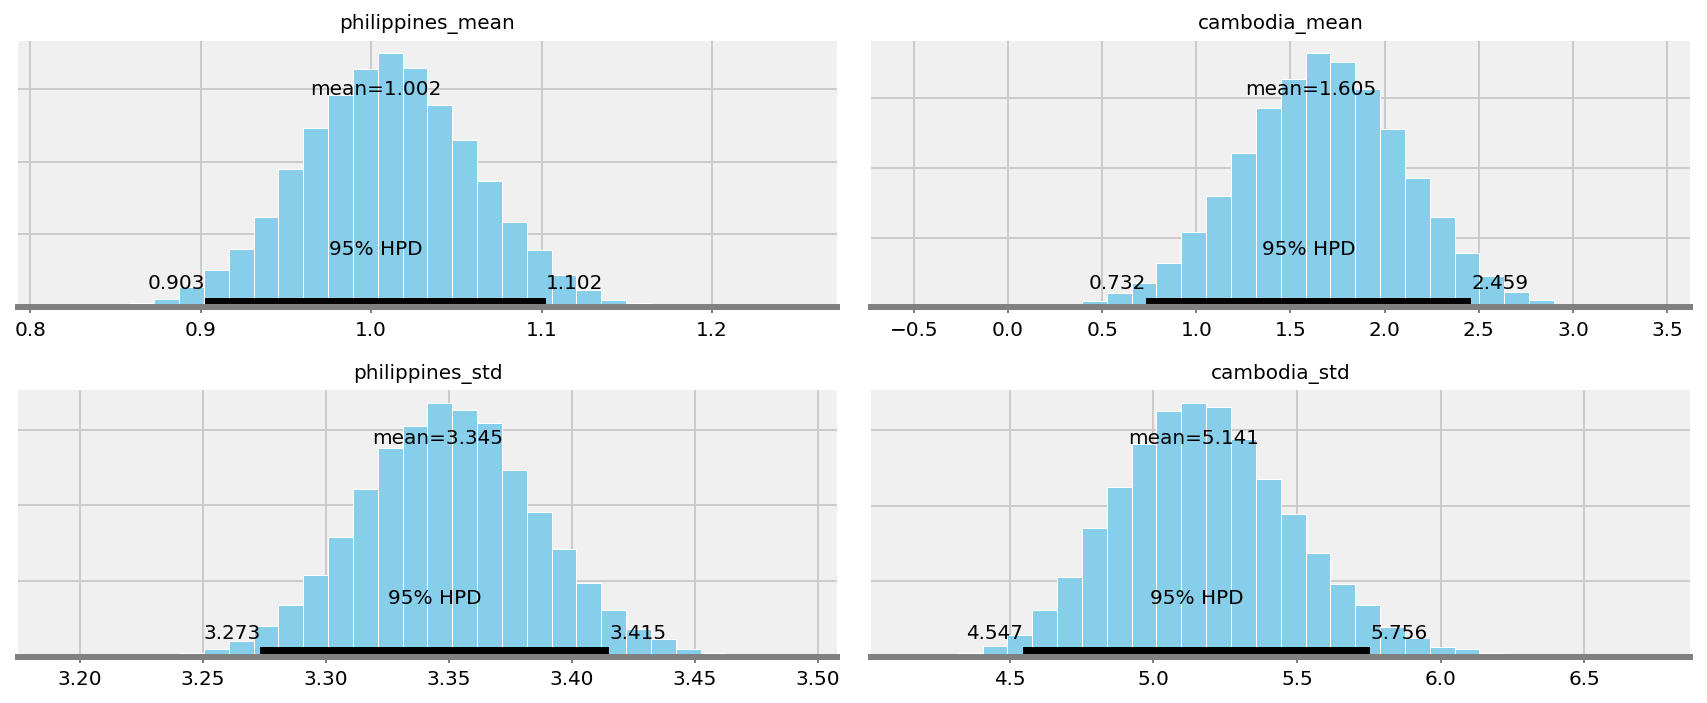

In [40]:
pm.plot_posterior(trace[5000::3],
                  varnames=['philippines_mean', 'cambodia_mean',
                            'philippines_std', 'cambodia_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDFE67438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023EDFE5F240>], dtype=object)

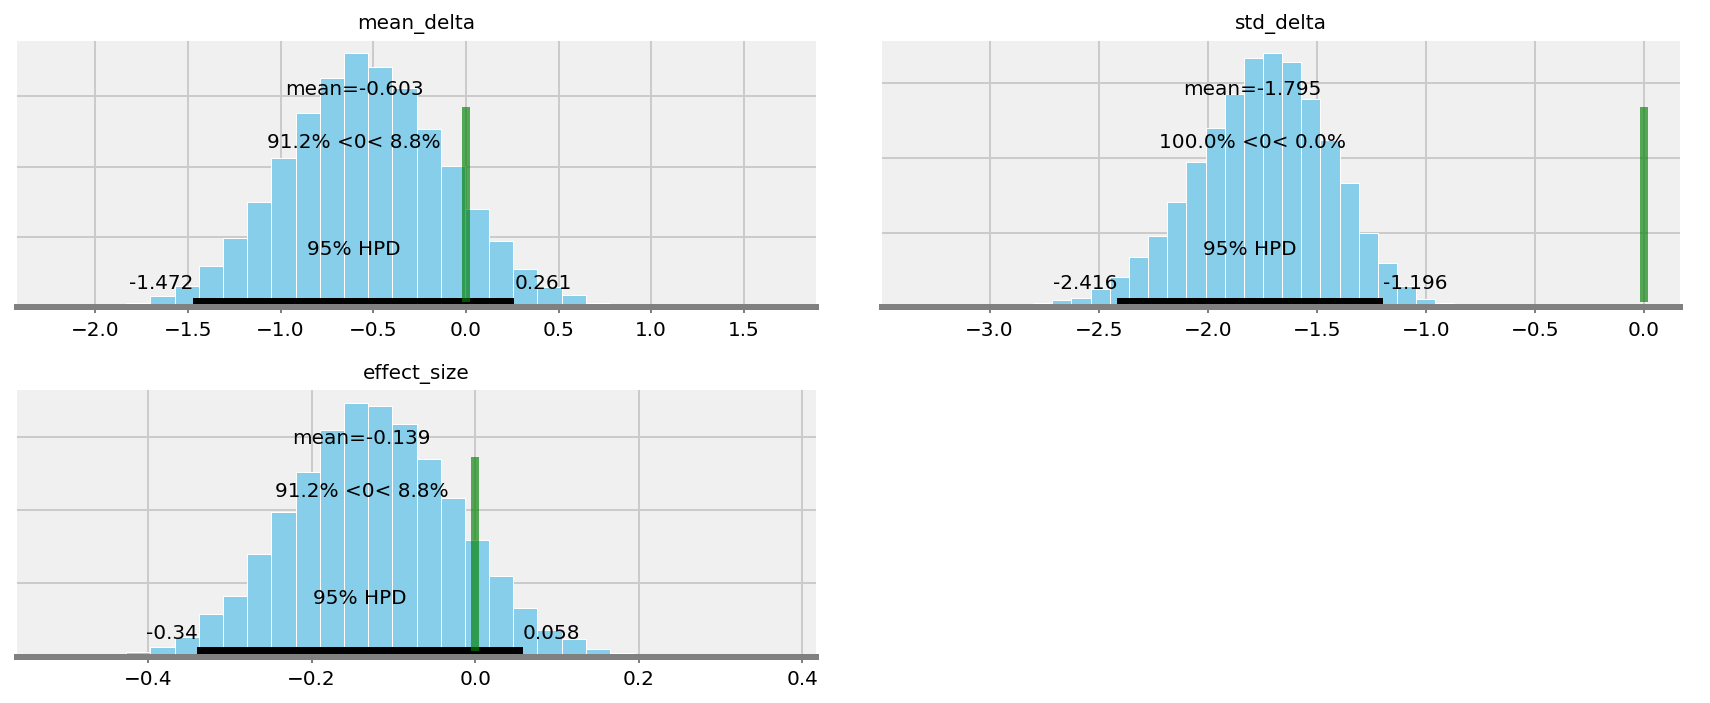

In [41]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

Surprisingly, there is not enough evidence to say that the Philippines and Cambodia have a significant difference in kills